In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from scipy.stats import skew
from scipy.stats import shapiro
from sklearn.decomposition import PCA

## READING THE DATASET

In [2]:
income_df=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
income_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
income_df["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [5]:
income_df.shape

(9557, 143)

In [6]:
income_df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [7]:
income_df["idhogar"].head()

0    21eb7fcc1
1    0e5d7a658
2    2c7317ea8
3    2b58d945f
4    2b58d945f
Name: idhogar, dtype: object

In [8]:
income_df["Id"].head()

0    ID_279628684
1    ID_f29eb3ddd
2    ID_68de51c94
3    ID_d671db89c
4    ID_d56d6f5f5
Name: Id, dtype: object

In [9]:
income_df["dependency"].head()

0     no
1      8
2      8
3    yes
4    yes
Name: dependency, dtype: object

In [10]:
income_df["edjefe"].head()

0    10
1    12
2    no
3    11
4    11
Name: edjefe, dtype: object

In [11]:
income_df["edjefa"].head()

0    no
1    no
2    11
3    no
4    no
Name: edjefa, dtype: object

# There are five objects available in the dataset they are  Id,idhogar,dependency,edjefe,edjefa

# The target variable in this dataset is target

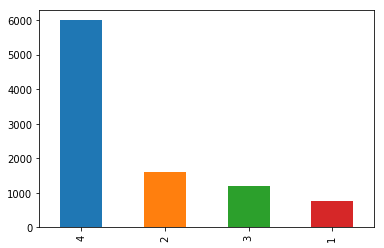

In [12]:
a=income_df["Target"].value_counts()
a.plot(kind="bar")

In [13]:
# target variable 4 has highest count

# Removing the null values

In [14]:
for i in income_df.columns:
    if income_df[i].isna().sum()>0:
        print(i,":",income_df[i].isna().sum())

v2a1 : 6860
v18q1 : 7342
rez_esc : 7928
meaneduc : 5
SQBmeaned : 5


In [15]:
income_df["v2a1"].isna().sum()

6860

In [16]:
# there are almost 70%  of null values present in columns v2a1,v18q1,rez_esc so if we are removing those null values 
# it will affect the entire dataset so i am going to remove it 

In [17]:
income_df.drop(["v2a1","v18q1","rez_esc"],axis=1,inplace=True)
income_df.shape

(9557, 140)

In [18]:
## there are only five null values in meaneduc and SQBmeaned so i am dropping the null values

In [19]:
income_df.dropna(inplace=True)
income_df.shape

(9552, 140)

## Understand the type of data



In [20]:
for i in income_df.columns:
    if i!="Id" and i!="idhogar" and i!="dependency" and i!= "edjefe" and i!="edjefa":
        print(i)
        print(shapiro(income_df[i]))
        print("********")

hacdor
(0.18718743324279785, 0.0)
********
rooms
(0.9395968317985535, 0.0)
********
hacapo
(0.13477909564971924, 0.0)
********
v14a
(0.04357200860977173, 0.0)
********
refrig
(0.20097774267196655, 0.0)
********
v18q
(0.5224144458770752, 0.0)
********
r4h1
(0.6048634052276611, 0.0)
********
r4h2
(0.8482615351676941, 0.0)
********
r4h3
(0.8878777027130127, 0.0)
********
r4m1
(0.6145310401916504, 0.0)
********
r4m2
(0.8233563303947449, 0.0)
********
r4m3
(0.8739997744560242, 0.0)
********
r4t1
(0.7390720844268799, 0.0)
********
r4t2
(0.8919049501419067, 0.0)
********
r4t3
(0.9098540544509888, 0.0)
********
tamhog
(0.909616231918335, 0.0)
********
tamviv
(0.8943553566932678, 0.0)
********
escolari
(0.9570783972740173, 0.0)
********
hhsize
(0.909616231918335, 0.0)
********
paredblolad
(0.623530924320221, 0.0)
********
paredzocalo
(0.29524844884872437, 0.0)
********
paredpreb
(0.4760468006134033, 0.0)
********
pareddes
(0.06388729810714722, 0.0)
********
paredmad
(0.37118804454803467, 0.0)
*

## finding how many values are normally distributed

In [21]:
count=0
for i in income_df.columns:
    if i!="Id" and i!="idhogar" and i!="dependency" and i!= "edjefe" and i!="edjefa":
        if shapiro(income_df[i]) > (0.5,0.0):
            count=count+1
print(count)

59


In [22]:
# out of 140 columns only 59 columns are only normally distributed   so the entire dataset is not normally distributed 

## To find whether the data is biased or not 

In [23]:
positive=0
negative=0
print("columns which are negatively skewed: ")
for i in income_df.columns:
    if i!="Id" and i!="idhogar" and i!="dependency" and i!= "edjefe" and i!="edjefa":
        if skew(income_df[i]) > 0 :
            positive=positive+1
        else:
            print(i)
            negative=negative+1
print(positive)
print(negative)

columns which are negatively skewed: 
v14a
refrig
paredblolad
pisomoscer
techozinc
cielorazo
abastaguadentro
public
sanitario3
elimbasu1
elimbasu5
epared3
etecho3
eviv3
female
tipovivi1
mobilephone
lugar1
area1
Target
115
20


In [24]:
if positive < negative:
    print("the data is left skewed")
elif positive > negative:
    print("the data is right skewed")
else:
    print("the data is balanced ")

the data is right skewed


## Finding the null values in the target variable  

In [25]:
income_df["Target"].value_counts()

4    5991
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [26]:
income_df["Target"].isna().sum()

0

In [27]:
## there are no null valus in the Target column 

##  Check if there is a house without a family head.

In [28]:
family_head=income_df["parentesco1"].value_counts()

In [29]:
family_head

0    6582
1    2970
Name: parentesco1, dtype: int64

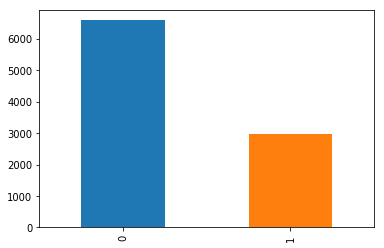

In [30]:
family_head.plot(kind="bar")

In [31]:
len(list(income_df['Id'].unique()))


9552

In [32]:
len(list(income_df['idhogar'].unique()))


2985

In [33]:
income_df[['idhogar','Target']].groupby('idhogar').head(100)


,idhogar,Target
0,21eb7fcc1,4
1,0e5d7a658,4
2,2c7317ea8,4
3,2b58d945f,4
4,2b58d945f,4
5,2b58d945f,4
6,2b58d945f,4
7,d6dae86b7,4
8,d6dae86b7,4
9,d6dae86b7,4


In [34]:
##no they have different poverty levels for some families¶

In [35]:
(income_df[['idhogar','parentesco1']].groupby('idhogar').sum()).where(income_df[['idhogar','parentesco1']].groupby('idhogar').sum()==0).count()


parentesco1    15
dtype: int64

In [36]:
Target=income_df["Target"]
Target.head()

0    4
1    4
2    4
3    4
4    4
Name: Target, dtype: int64

In [37]:
income_df.drop(["Id","idhogar","dependency","edjefe","edjefa"],axis=1,inplace=True)
income_df.shape

(9552, 135)

## Now performing the above operations with testing dataset

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [39]:
test_data.shape

(23856, 142)

In [40]:
for i in test_data.columns:
    if test_data[i].isna().sum()>0:
        print(i,":",test_data[i].isna().sum())

v2a1 : 17403
v18q1 : 18126
rez_esc : 19653
meaneduc : 31
SQBmeaned : 31


In [41]:
# there are almost 70%  of null values present in columns v2a1,v18q1,rez_esc so if we are removing those null values 
# it will affect the entire dataset so i am going to remove it 

In [42]:
test_data.drop(["v2a1","v18q1","rez_esc"],axis=1,inplace=True)
test_data.shape

(23856, 139)

In [43]:
## there are only five null values in meaneduc and SQBmeaned so i am dropping the null values

In [44]:
test_data.dropna(inplace=True)
test_data.shape

(23825, 139)

In [45]:
test_data.drop(["Id","idhogar","dependency","edjefe","edjefa"],axis=1,inplace=True)
test_data.shape

(23825, 134)

## selecting the feature and dependent variable

In [46]:
feature =income_df.columns.drop(["Target"]) 
dependent=["Target"]

## PCA TECHNIQUE

In [47]:
## SINCE THE TRAIN AND TEST DATASET IS GIVEN INDIVIDUALLY IT NOT NECESSARY TO PERFORM TRAIN_TEST_SPLIT   

In [48]:
pca=PCA(n_components=30)
income_train=pd.DataFrame(pca.fit_transform(income_df[feature]))
income_test=pd.DataFrame(pca.transform(test_data[feature]))

In [49]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.96499212e-01, 2.23663348e-03, 6.22769825e-04, 5.45127495e-04,
       6.07130982e-05, 2.20703084e-05, 4.51853901e-06, 3.50192914e-06,
       2.03629589e-06, 4.58282922e-07, 3.50592063e-07, 3.24409255e-07,
       2.32799936e-07, 1.99412972e-07, 1.77153958e-07, 1.39551261e-07,
       1.34889552e-07, 1.01893131e-07, 8.39053879e-08, 7.44191087e-08,
       6.62025359e-08, 6.49456564e-08, 5.88617933e-08, 4.80546648e-08,
       4.54072329e-08, 4.27861699e-08, 4.12844030e-08, 4.01960865e-08,
       3.97588354e-08, 3.31055748e-08])

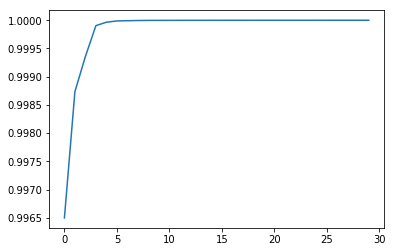

In [50]:
##to plot cumlative sum of variance 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators=10)
rmodel.fit(income_train,income_df["Target"])
print("train accuracy")
display(rmodel.score(income_train,income_df["Target"]))



train accuracy


0.9959170854271356

In [52]:
y_pred=rmodel.predict(income_test)
y_pred

array([4, 4, 4, ..., 4, 4, 2], dtype=int64)

In [53]:
y_pred.shape

(23825,)

In [54]:
test_data["Target"]=y_pred

In [55]:
test_data.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,5,0,1,1,0,1,1,2,0,...,0,16,9,0,1,2.25,0.25,272.25,16,4
1,0,5,0,1,1,0,1,1,2,0,...,256,1681,9,0,1,2.25,0.25,272.25,1681,4
2,0,5,0,1,1,0,1,1,2,0,...,289,1681,9,0,1,2.25,0.25,272.25,1681,4
3,0,14,0,1,1,1,0,1,1,0,...,256,3481,1,256,0,1.00,0.00,256.00,3481,4
5,0,3,0,1,1,1,0,0,0,0,...,256,1444,4,0,0,1.00,0.00,182.25,1444,4


In [56]:

display(rmodel.score(income_test,test_data["Target"]))

1.0

## if we are normalizing the data with target variable then it becomes continious variable and we cannot apply random variable

## if we are normalizing the data without target then the value is too high and we cannot evaluate it so i am using it without normalization

In [57]:
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5,shuffle=False,random_state=100)
train_acc=[]


X=income_test
y=test_data["Target"]
print(X.shape)
print(y.shape)
for i,(train,test) in enumerate(k_fold.split(X,y)):
    
        
    r1model=RandomForestClassifier()
    
    r1model.fit(X.iloc[train],y.iloc[train])
    print("train accuracy")
    display(r1model.score(X.iloc[train],y.iloc[train]))
    train_acc.append(r1model.score(X.iloc[train],y.iloc[train]))
print("mean value of accuracy")
print(np.mean(train_acc))



(23825, 30)
(23825,)
train accuracy


0.9931269674711437

train accuracy


0.9939664218258132

train accuracy


0.9939139559286464

train accuracy


0.9945960125918153

train accuracy


0.9950682056663169

mean value of accuracy
0.9941343126967471


In [58]:


from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5,shuffle=False,random_state=100)
train_acc=[]


X=income_train
y=income_df["Target"]
print(X.shape)
print(y.shape)
for i,(train,test) in enumerate(k_fold.split(X,y)):
    
        
    r1model=RandomForestClassifier()
    
    r1model.fit(X.iloc[train],y.iloc[train])
    print("train accuracy")
    display(r1model.score(X.iloc[train],y.iloc[train]))
    display(r1model.score(X.iloc[test],y.iloc[test]))
    train_acc.append(r1model.score(X.iloc[train],y.iloc[train]))
print("mean value of accuracy")
print(np.mean(train_acc))



(9552, 30)
(9552,)
train accuracy


0.9959429394058369

train accuracy


0.9946342101819133

train accuracy


0.9941114891389689

train accuracy


0.9947657681235279

train accuracy


0.9950274797173515

mean value of accuracy
0.9948963773135198
